# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных:


*  airports_nearest — расстояние до ближайшего   
*аэропорта в метрах (м)  
*balcony — число балконов  
*ceiling_height — высота потолков (м)  
*cityCenters_nearest — расстояние до центра города (м)  
*days_exposition — сколько дней было размещено *объявление (от публикации до снятия)  
*first_day_exposition — дата публикации  
*floor — этаж  
*floors_total — всего этажей в доме  
*is_apartment — апартаменты (булев тип)  
*kitchen_area — площадь кухни в квадратных метрах (м²)  
*last_price — цена на момент снятия с публикации  
*living_area — жилая площадь в квадратных метрах(м²)  
*locality_name — название населённого пункта  
*open_plan — свободная планировка (булев тип)  
*parks_around3000 — число парков в радиусе 3 км  
*parks_nearest — расстояние до ближайшего парка (м)  
*ponds_around3000 — число водоёмов в радиусе 3 км  
*ponds_nearest — расстояние до ближайшего водоёма (м)  
*rooms — число комнат  
*studio — квартира-студия (булев тип)  
*total_area — площадь квартиры в квадратных метрах (м²)  
*total_images — число фотографий квартиры в объявлении  






### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('chained_assignment', None)
try:
    data = pd.read_csv('/content/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

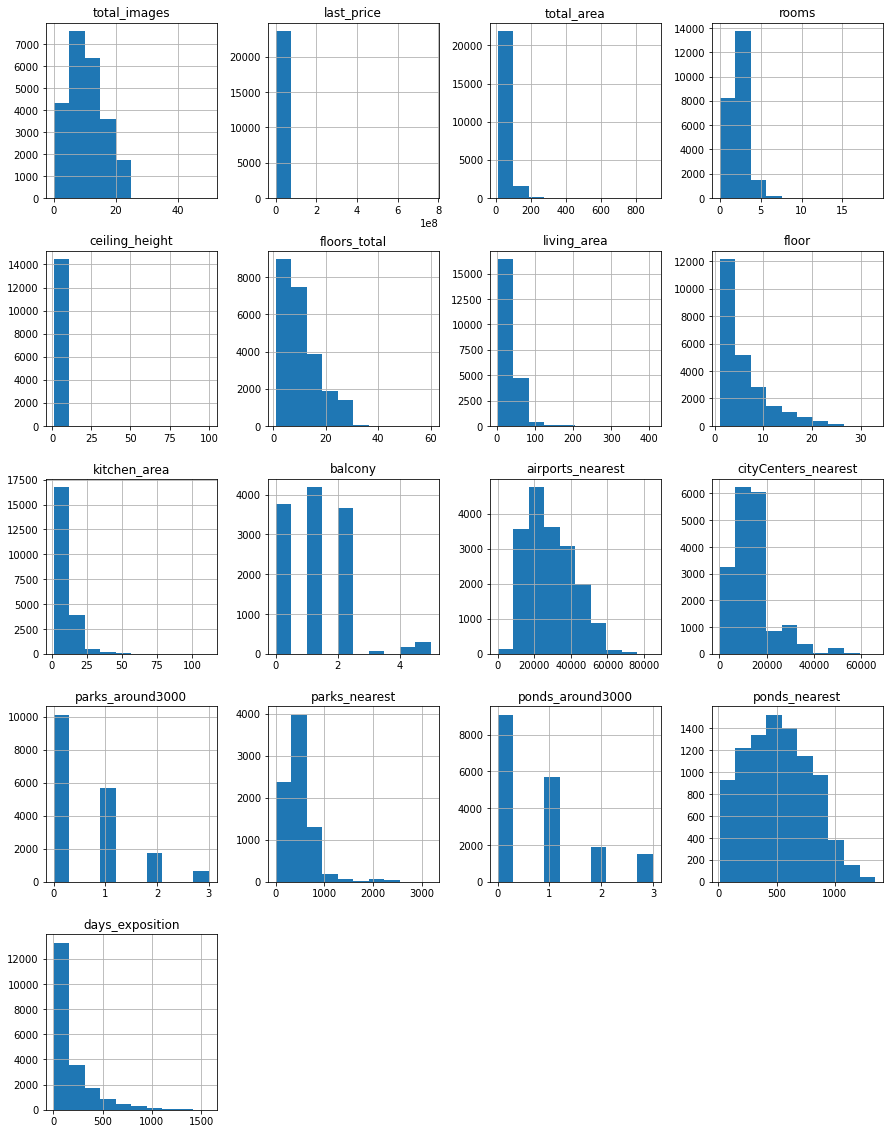

In [4]:
data.hist(figsize=(15, 20))

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:**  
Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

### Предобработка данных

**Определим в каких столбцах есть пропуски:**


In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.**

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Если есть пропуски в столбце is_apartment, то они означают, что квартира не является аппартаментами. Заполним все пропуски в данном столбце значением False:**

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

**Пропуски в колонках floors_total и locality_name незначительные (86 и 49 пропусков), поэтому можно их просто удалить:**

In [10]:
data = data.dropna(subset=['floors_total','locality_name'])

**Обработка пропусков в столбце ceiling_height:**  
Потолки больше 20+ метров явно выше обычных и звучат странно, логично предположить, что это вещественные значения (25 метров - 2,5 метра).  
Поэтому предлагаю поделить их на 10.  
А пропуски предлагаю заменить медианным значением от 2,5 метров до 10 метров.

In [11]:
data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] / 10

In [12]:
ceiling = data.query('(ceiling_height < 10) or (ceiling_height >= 2.1)')
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling["ceiling_height"].median())

**Обработка пропусков в столбце kitchen_area:**      
Чтобы заменить пропуски в этом столбце найдем отношение всей жилой площади к кухнями.  
После заменим на это значение.

In [13]:
kitchen_ratio = data['kitchen_area'].sum() / data['total_area'].sum()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_ratio)
data['kitchen_area'].isna().sum()

0

**Обработка пропусков в столбце living_area:**  
Проведем такие операции как и со столбцом kitchen_area

In [14]:
living_ratio = data['living_area'].sum() / data['total_area'].sum()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_ratio)

data['living_area'].isna().sum()

0

**Переименуем столбцы cityCenters_nearest, 
ponds_around3000, 
parks_around3000**

In [15]:

data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'ponds_around3000' : 'ponds_around', 'parks_around3000' : 'parks_around'}, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,83.629164,9,False,...,25.212057,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Обработка пропусков в столбце ponds_around и 
parks_around:**  
Пропуски заменим 0, т.к скорее всего парки и водоемы отсутствуют.

In [16]:
data['ponds_around'].fillna(0, inplace=True)
data['parks_around'].fillna(0, inplace=True)
print(data['ponds_around'].isna().sum())
print(data['parks_around'].isna().sum())

0
0


**Обработка пропусков в столбце ponds_around и parks_around:**  
Так как значения показывают расстояние в радиусе 3 км, то нецелесообразно изменять их на 0.
Таким образом оставим их неизменными



**Обработка пропусков в столбце days_exposition:**  
Скорее всего пропуски связаны с тем, что объявления еще не сняты с публикации, поэтому оставим этот столбец неизменным.

**Найдем и устраним неявные дубликаты:**


*   Изменим на нижний регистр
*   Заменим букву "Ё" на "Е"
*   Отбросим типы городов оставив только названия



In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'].nunique()

364

In [19]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
to_replace = [
    'поселок городского типа ', 'поселок ', 'деревня ', 'городской ', 'садовое товарищество ', 
    'садоводческое некоммерческое товарищество ', 'коттеджный ', 'при железнодорожной станции '
]
for substr in to_replace:
  data['locality_name'] = data['locality_name'].str.replace(substr, '')

In [20]:
data['locality_name']

0         санкт-петербург
1                  шушары
2         санкт-петербург
3         санкт-петербург
4         санкт-петербург
               ...       
23694     санкт-петербург
23695               тосно
23696    село рождествено
23697     санкт-петербург
23698         новый учхоз
Name: locality_name, Length: 23565, dtype: object

**Изменим формат данных в столбце first_day_exposition:**

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Изменим типы данных:**

In [22]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around',
               'parks_nearest', 'ponds_around', 'ponds_nearest', 'days_exposition']
for i in list_to_int:
    data[i] = data[data[i].notnull()][i].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Проверка на явные дубликаты:**

In [25]:
data.duplicated().sum()

0

Явных дубликатов не выявлено

In [26]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


**Вывод:**   
Во многих столбцах были пропущены значения, большую часть, которую сложно заменить и скорее всего это связано с ошибкой при сборе данных.Также присутствовали аномальные значения, которые выбивались из логики.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу новый столбец - price_area(цену одного квадратного метра):**


In [27]:
data['price_area'] = round(data['last_price']/data['total_area'])
data['price_area']

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_area, Length: 23565, dtype: float64

**Добавим новый столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [28]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek
data['day_of_week_exposition']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_of_week_exposition, Length: 23565, dtype: int64

**Добавим новый столбец - месяц публикации объявления:**

In [29]:

data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 23565, dtype: int64

**Добавим новый столбец - год публикации объявления:**


In [30]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 23565, dtype: int64

**Добавим новый столбец - тип этажа квартиры (значения — «‎первый», «последний», «другой»):**

In [31]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    
    if row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

data['floor_type'] = data.apply(floor_group, axis=1)
data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23565, dtype: object

**Добавим новый столбец - расстояние до центра города в километрах:**

In [32]:

data['center_distance_km'] = (data['city_centers_nearest'] / 1000).round()
data['center_distance_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: center_distance_km, Length: 23565, dtype: float64

### Проведите исследовательский анализ данных

**Изучим общую площадь:**

In [33]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:xlabel='total_area'>

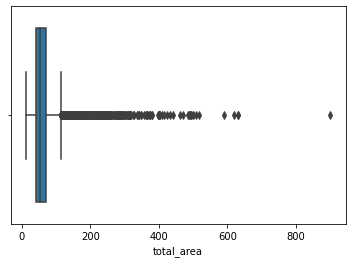

In [34]:
sns.boxplot(x=data['total_area'])

<AxesSubplot:>

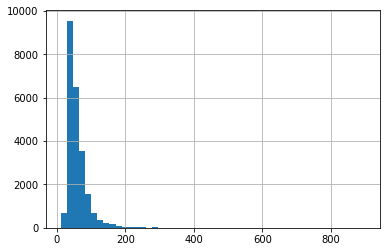

In [35]:
data['total_area'].hist(bins=50)

Много выбросов поэтому отсечем лишнее

<AxesSubplot:xlabel='total_area'>

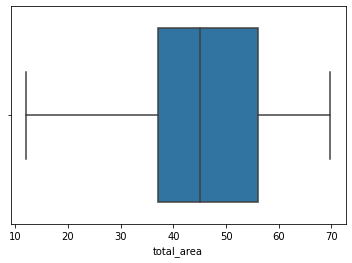

In [36]:
good_data_area = data.loc[data['total_area'] < 69.9, 'total_area']
sns.boxplot(x=good_data_area)

<AxesSubplot:>

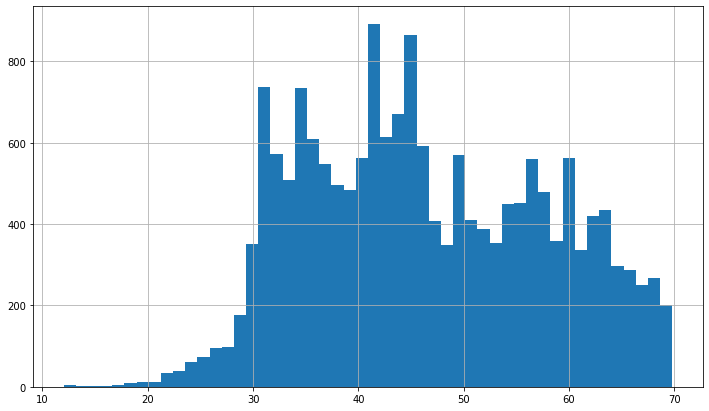

In [37]:
good_data_area.hist(figsize=(12, 7), bins=50)

In [38]:
good_data_area.describe()

count    17687.000000
mean        46.362488
std         11.428512
min         12.000000
25%         37.000000
50%         45.000000
75%         56.000000
max         69.800000
Name: total_area, dtype: float64

Средняя площадь составляет 46.35 кв. м. среди квартир, включенных в выборку

Судя по гистограмме, большинство квартир по площади находятся в диапазоне 30-50 кв. м.

**Изучим жилую площадь:**

In [39]:
data['living_area'].describe()

count    23565.000000
mean        34.365588
std         22.190610
min          2.000000
25%         18.934905
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area'>

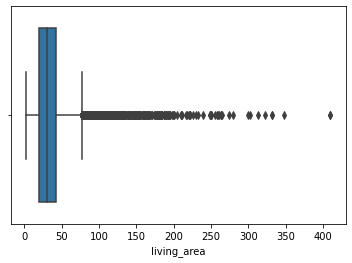

In [40]:

sns.boxplot(x=data['living_area'])

<AxesSubplot:>

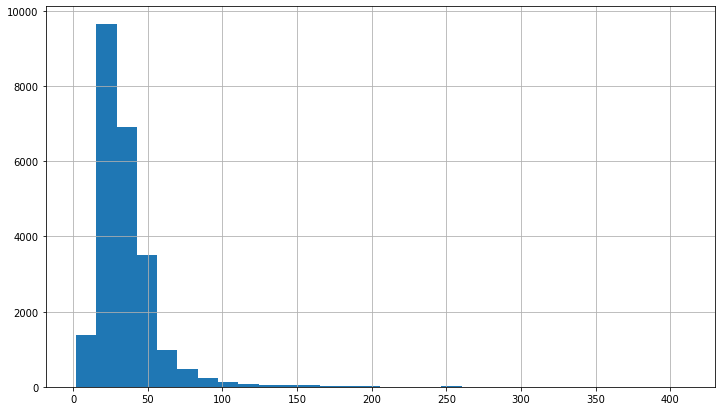

In [41]:
data['living_area'].hist(bins=30, figsize=(12, 7))

Уберем выбросы

<AxesSubplot:xlabel='living_area'>

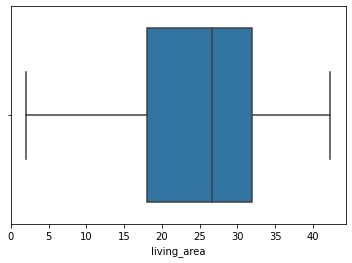

In [42]:
good_data_living = data.loc[data['living_area'] <= 42.3, 'living_area']
sns.boxplot(x=good_data_living)

<AxesSubplot:>

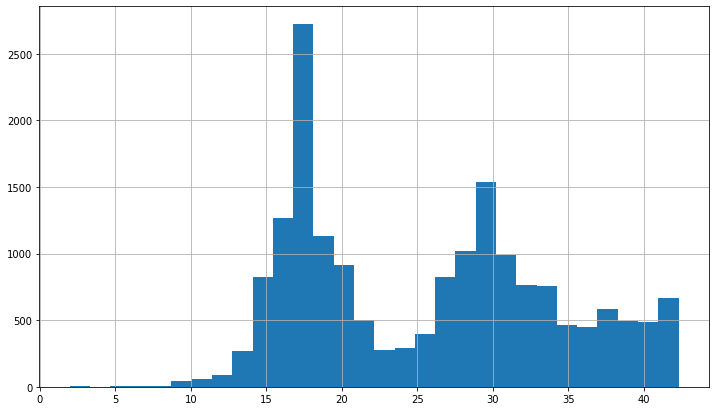

In [43]:
good_data_living.hist(bins=30, figsize=(12, 7))

In [44]:
print(good_data_living.median())
good_data_living.describe()

26.614061020864362


count    17837.000000
mean        25.684736
std          8.358906
min          2.000000
25%         18.000000
50%         26.614061
75%         32.000000
max         42.300000
Name: living_area, dtype: float64

По выборке без выбросов, средняя жилая площадь квартиры составляет 25.6 кв.м., однако больше всего квартир с жилой площадью в районе 15-20 и 27-32 кв. м. (в первом диапазоне квартир больше).

**Изучим площадь кухонь:**

In [45]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.411760
std          5.979533
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

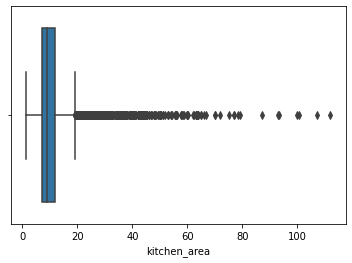

In [46]:
sns.boxplot(x=data['kitchen_area'])

<AxesSubplot:>

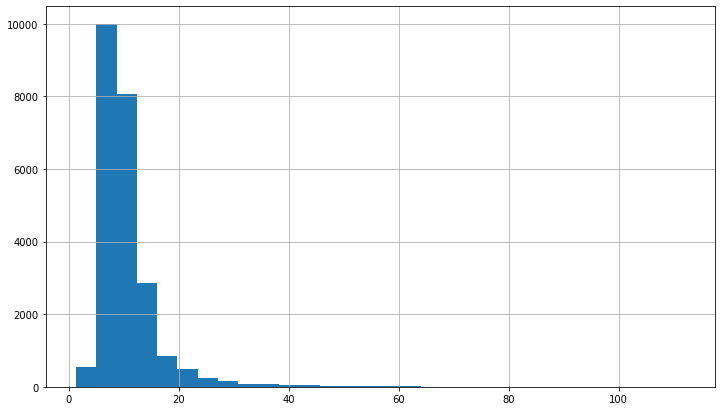

In [47]:
data['kitchen_area'].hist(bins=30, figsize=(12, 7))

Уберем выбросы

<AxesSubplot:xlabel='kitchen_area'>

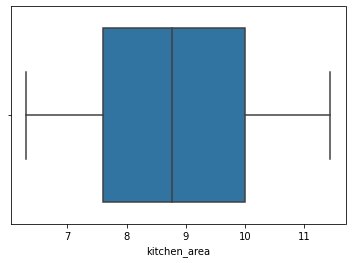

In [48]:
good_data_kitchen = data.loc[(6.3 <= data['kitchen_area']) & (data['kitchen_area'] <= 11.44), 'kitchen_area']
sns.boxplot(x=good_data_kitchen)

<AxesSubplot:>

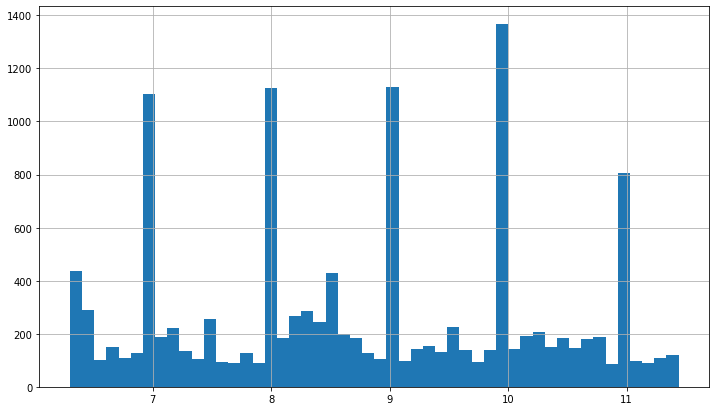

In [49]:
good_data_kitchen.hist(bins=50, figsize=(12, 7))

In [50]:
good_data_kitchen.describe()

count    13089.000000
mean         8.779507
std          1.425931
min          6.300000
25%          7.600000
50%          8.770000
75%         10.000000
max         11.440000
Name: kitchen_area, dtype: float64

По гистограмме видно большое количество целочисленных значений площадей. Возможно, имело смысл разбить кухни по площадям на группы 7-8 кв.м., 8-9 кв.м. и так далее. Средняя площадь при этом равна 8.81, а больше всего кухонь площадью 10 кв.м..

**Изучим цену объектов:**

In [51]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:xlabel='last_price'>

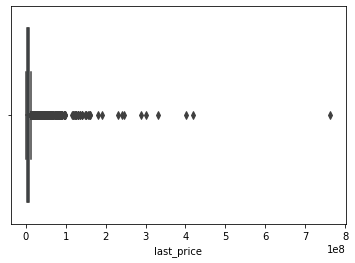

In [52]:
sns.boxplot(x=data['last_price'])

<AxesSubplot:>

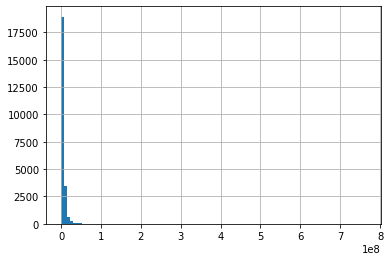

In [53]:
data['last_price'].hist(bins=100)

Избавимся от выбросов

<AxesSubplot:xlabel='last_price'>

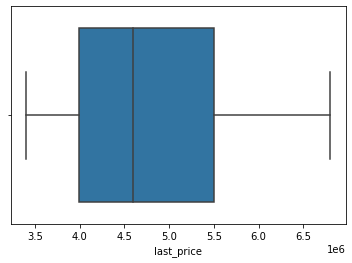

In [54]:
good_data_price = data.loc[(3.400000e+06 <= data['last_price']) & (data['last_price'] <= 6.800000e+06), 'last_price']
sns.boxplot(x=good_data_price)

<AxesSubplot:>

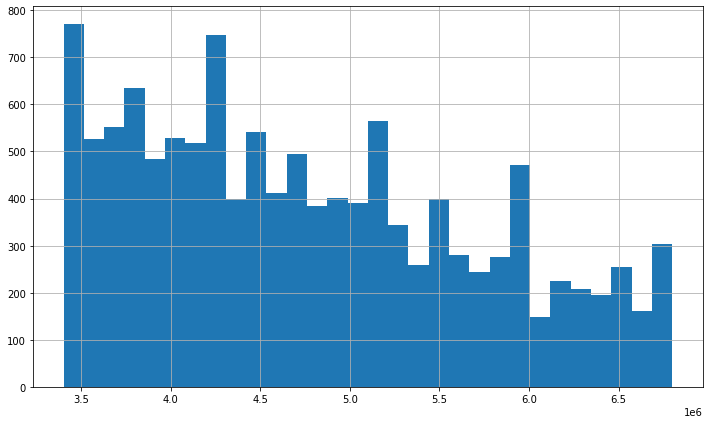

In [55]:
good_data_price.hist(bins=30, figsize=(12, 7))

In [56]:
good_data_price.describe()

count    1.211500e+04
mean     4.770269e+06
std      9.375187e+05
min      3.400000e+06
25%      3.990000e+06
50%      4.600000e+06
75%      5.500000e+06
max      6.800000e+06
Name: last_price, dtype: float64

При избавлении от выбросов средняя цена квартиры составляет 4.77 млн. рублей. 

**Исследуем количество комнат**

In [57]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

<AxesSubplot:>

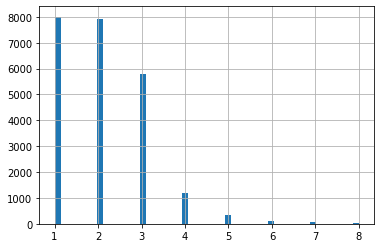

In [58]:
data['rooms'].hist(bins=50, range=(1, 8))

Большинство рзамещаемых квартир имеют 1-2 комнаты, меньше - 3, и намного меньше квартир с 4 и более комнатами.

**Исследуем высоту потолков**

In [59]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.699510
std          0.277506
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='ceiling_height'>

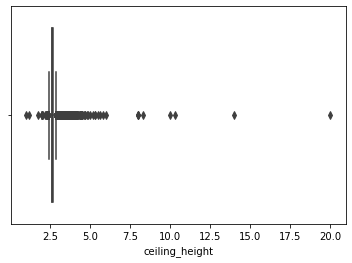

In [60]:
sns.boxplot(x=data['ceiling_height'])

<AxesSubplot:>

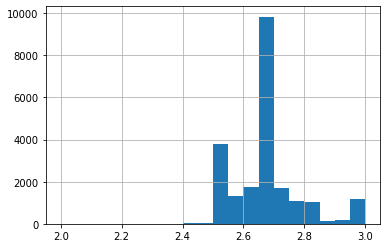

In [61]:
data['ceiling_height'].hist(bins=20, range=(2, 3))

С высотой потолков мы уже боролись выше и убирали выбросы.

Средняя высота потолков составляет 2.69, собственно, по гистограмме видно, что большинство высот потолков в квартирах находятся в диапазоне 2.6-2.7 м

**Изучим этаж квартир**

In [62]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:xlabel='floor'>

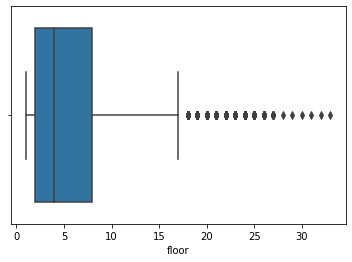

In [63]:
sns.boxplot(x=data['floor'])

<AxesSubplot:>

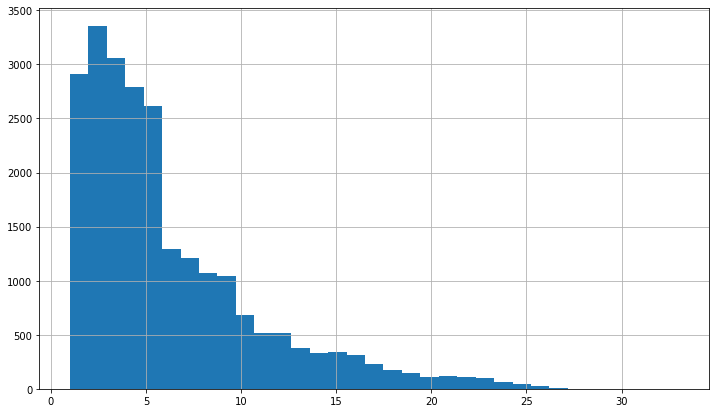

In [64]:
data['floor'].hist(bins=33, figsize=(12, 7))

По гистограмме видно, что в большинстве объявлений фигурируют квартиры с 1 по 5 этаж. Скорее всего, большинство квартир расположено в малоэтажных домах. Этажность домов мы исследуем позднее.

**Исследуем тип этажа квартиры («первый», «последний», «другой»)**

In [65]:
data.groupby('floor_type')['floor_type'].count()

floor_type
другой       17326
первый        2909
последний     3330
Name: floor_type, dtype: int64

<AxesSubplot:>

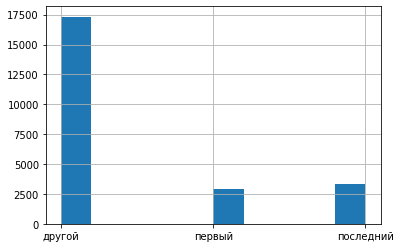

In [66]:
data['floor_type'].hist()

По гистограмме можно сделать вывод, что квартир на первом этаже меньше, чем на последнем. Логично, что квартир на остальных этажах намного больше.

#### Изучим общее количество этажей в доме

In [67]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:xlabel='floors_total'>

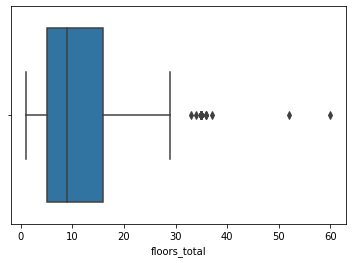

In [68]:
sns.boxplot(x=data['floors_total'])

<AxesSubplot:>

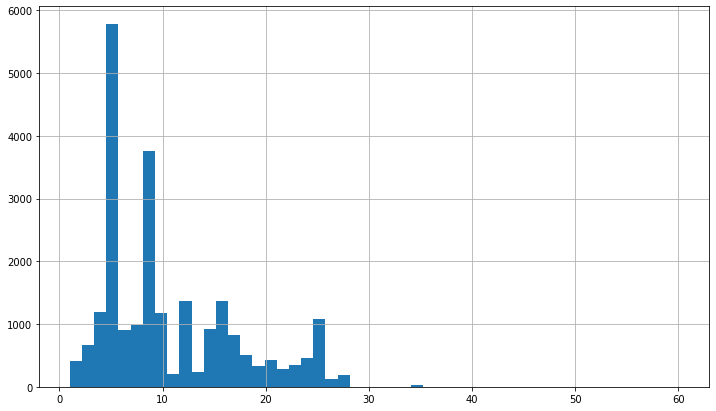

In [69]:
data['floors_total'].hist(bins=50, figsize=(12, 7))

Отсечем квартиры выше 20 этажа

<AxesSubplot:xlabel='floors_total'>

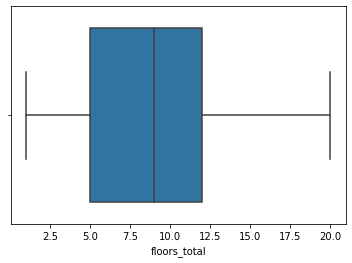

In [70]:
good_data_floors = data.loc[data['floors_total'] <= 20, 'floors_total']
sns.boxplot(x=good_data_floors)

<AxesSubplot:>

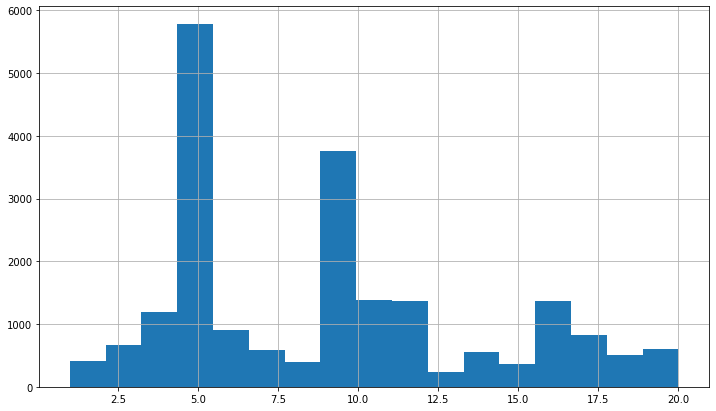

In [71]:
good_data_floors.hist(bins=17, figsize=(12,7))

In [72]:
good_data_floors.describe()

count    20893.000000
mean         8.928541
std          4.643506
min          1.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         20.000000
Name: floors_total, dtype: float64

In [73]:
good_data_floors.value_counts().sort_values()

1       25
11     202
13     229
20     271
19     339
15     365
2      381
8      388
18     505
14     553
7      589
3      667
17     833
6      910
10    1174
4     1193
12    1361
16    1375
9     3758
5     5775
Name: floors_total, dtype: int64

Большинство квартир в объявлениях составляют 9-ти и 5-ти этажки  
После идут 16-ти,12-ти 4-х и 10-ти этажные дома. 


**Изучим расстояние до центра города в метрах**

In [74]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:xlabel='city_centers_nearest'>

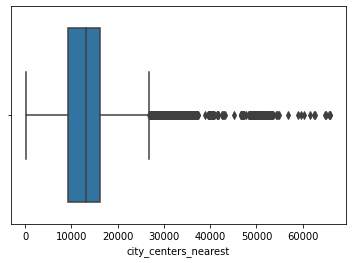

In [75]:
sns.boxplot(x=data['city_centers_nearest'])

<AxesSubplot:>

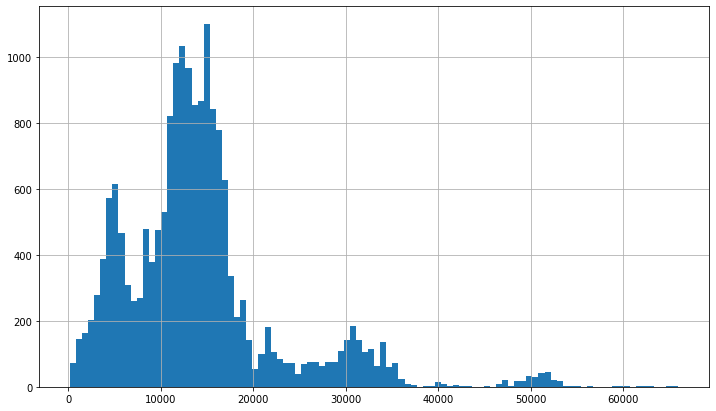

In [76]:
data['city_centers_nearest'].hist(bins=100, figsize=(12, 7))

Есть квартиры, расположенные на огромном расстоянии до центра города. Но мы рассмотрим значения между 1 и 3 квартилем в выборке.

<AxesSubplot:xlabel='city_centers_nearest'>

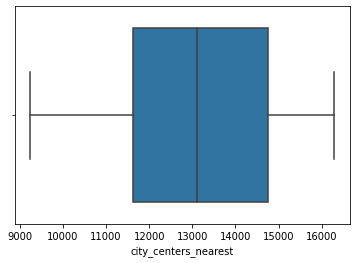

In [77]:
good_data_city = data.loc[(9238 <= data['city_centers_nearest']) & (data['city_centers_nearest'] <= 16293), 'city_centers_nearest']
sns.boxplot(x=good_data_city)

<AxesSubplot:>

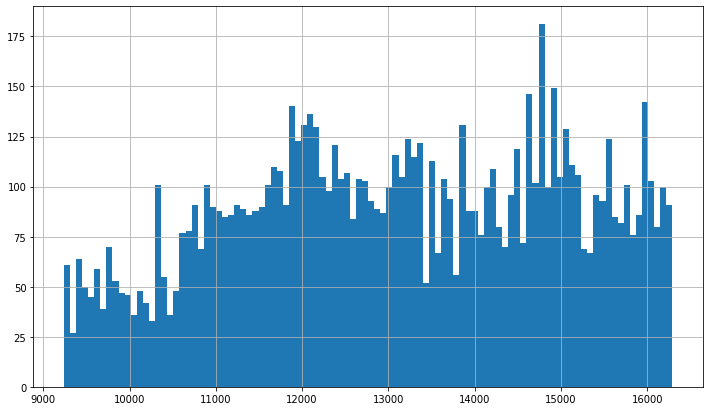

In [78]:
good_data_city.hist(bins=100, figsize=(12, 7))

In [79]:
good_data_city.describe()

count     9055.000000
mean     13084.852236
std       1885.876337
min       9238.000000
25%      11633.000000
50%      13105.000000
75%      14749.000000
max      16293.000000
Name: city_centers_nearest, dtype: float64

После удаления выбросов среднее расстояние 13 км.


**Изучим расстояние до ближайшего аэропорта**

In [80]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:xlabel='airports_nearest'>

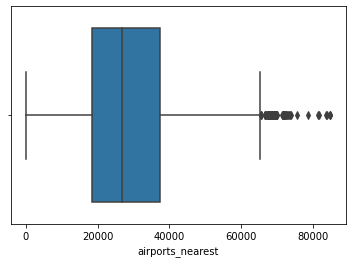

In [81]:
sns.boxplot(x=data['airports_nearest'])

<AxesSubplot:>

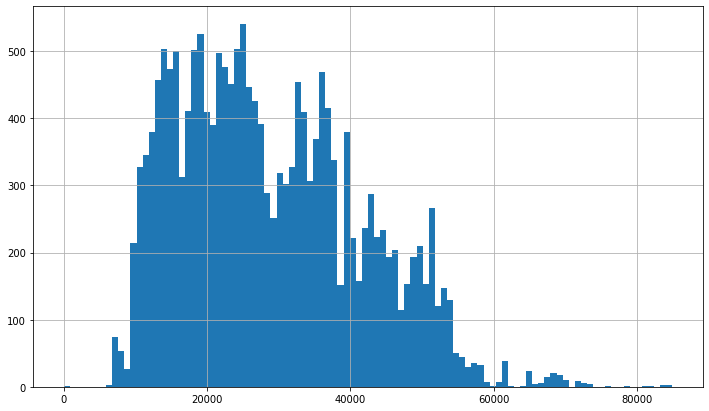

In [82]:
data['airports_nearest'].hist(bins=100, figsize=(12, 7))

Удалим выбросы

<AxesSubplot:xlabel='airports_nearest'>

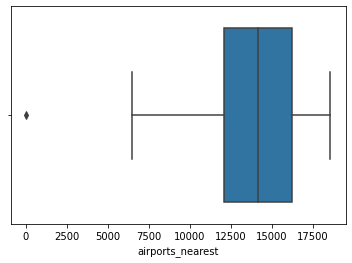

In [83]:
good_data_air = data.loc[(data['airports_nearest'] <= 37273.5) & (data['airports_nearest'] <= 18585.000000), 'airports_nearest']
sns.boxplot(x=good_data_air)

<AxesSubplot:>

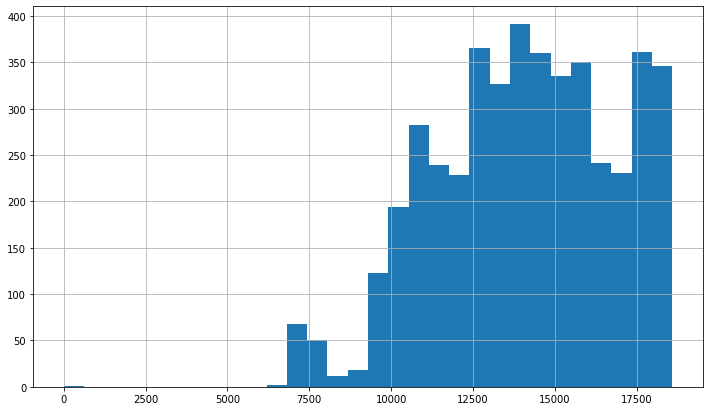

In [84]:
good_data_air.hist(bins=30, figsize=(12, 7))

In [85]:
good_data_air.describe()

count     4527.000000
mean     14103.352772
std       2746.522203
min          0.000000
25%      12094.000000
50%      14188.000000
75%      16245.000000
max      18585.000000
Name: airports_nearest, dtype: float64

Большая часть городов из нашей выборки расположена на расстоянии более чем 10 км от аэропорта, при этом среднее расстояние - 14 км.

**Изучим расстояния до ближайшего парка**

In [86]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:xlabel='parks_nearest'>

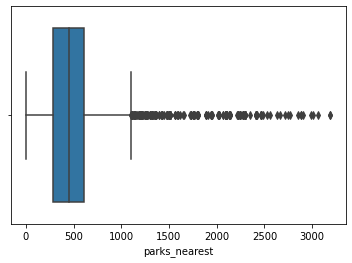

In [87]:
sns.boxplot(x=data['parks_nearest'])

<AxesSubplot:>

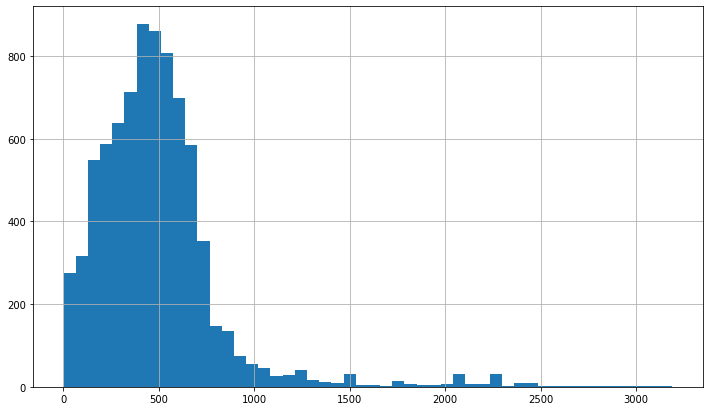

In [88]:
data['parks_nearest'].hist(bins=50, figsize=(12, 7))

Уберём выбросы.

<AxesSubplot:xlabel='parks_nearest'>

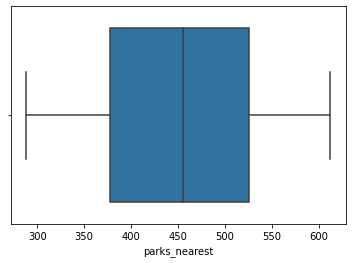

In [89]:
good_data_parks = data.loc[(288 <= data['parks_nearest']) & (data['parks_nearest'] <= 612), 'parks_nearest']
sns.boxplot(x=good_data_parks)

<AxesSubplot:>

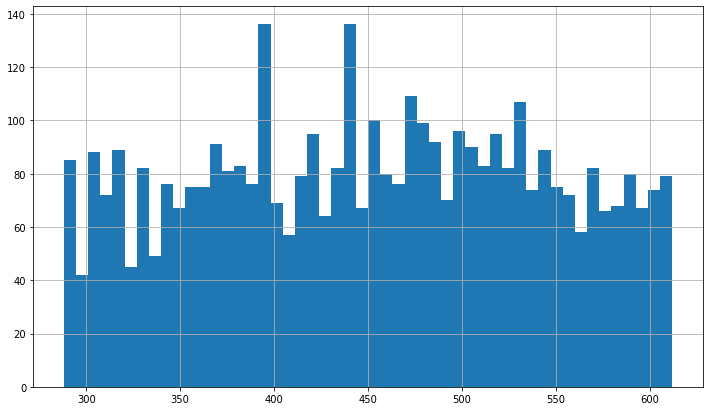

In [90]:
good_data_parks.hist(bins=50, figsize=(12, 7))

In [91]:
good_data_parks.describe()

count    4024.000000
mean      451.819085
std        90.019547
min       288.000000
25%       378.000000
50%       455.000000
75%       526.000000
max       612.000000
Name: parks_nearest, dtype: float64

Из тех данных, что мы имеем, среднее расстояние от дома до парка - 451 метров.

**Исследуем день и месяц публикации объявления**

In [92]:
data['day_of_week_exposition'].value_counts()

3    4276
1    4163
4    3980
2    3948
0    3596
5    1919
6    1683
Name: day_of_week_exposition, dtype: int64

<AxesSubplot:>

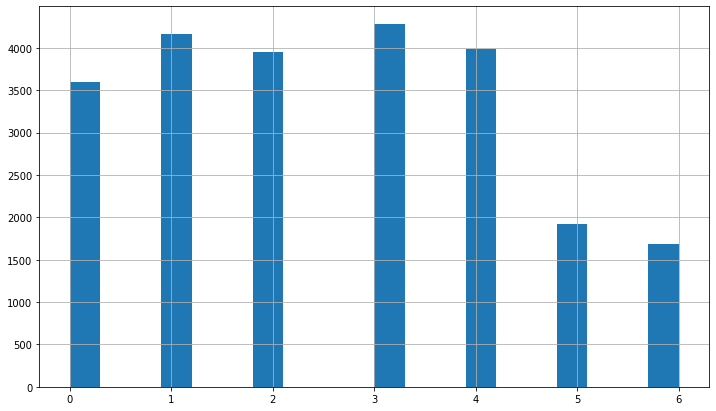

In [93]:
data['day_of_week_exposition'].hist(bins=20, figsize=(12, 7))

На выходных люди размещают меньше объявлений.

In [94]:
data['month_exposition'].value_counts()

2     2636
3     2575
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: month_exposition, dtype: int64

<AxesSubplot:>

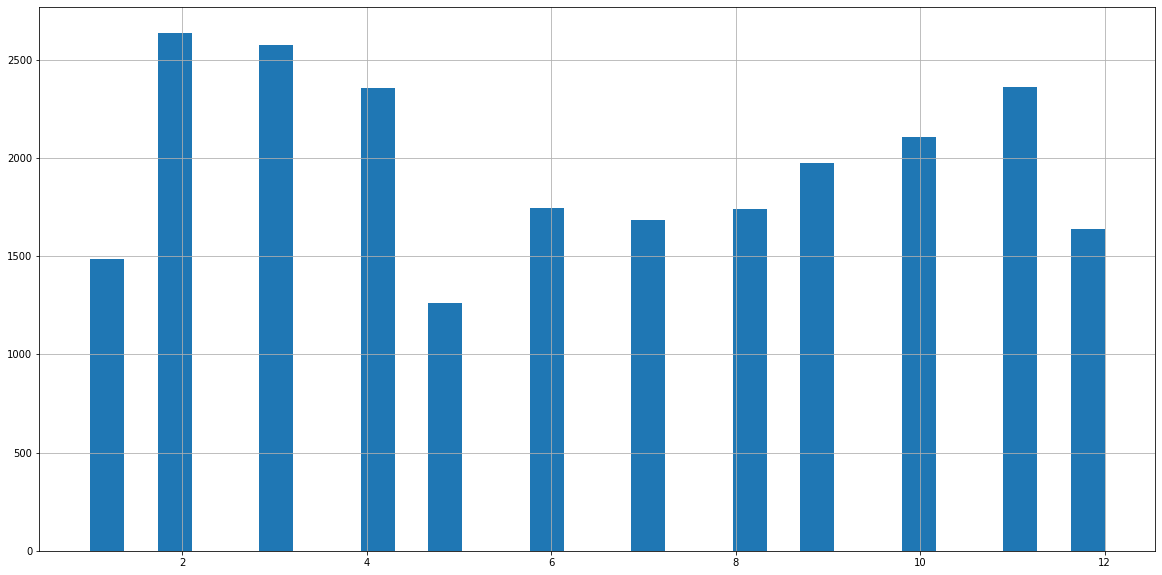

In [95]:
data['month_exposition'].hist(bins=30, figsize=(20, 10))

Высоким сезоном можно считать февраль, март, апрель. Затем идет резкий спад и постепенный рост до декабря. Рождественский период (декабрь, январь) можно считать низким сезоном.

**Изучим, как быстро продавались квартиры**

In [96]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='days_exposition'>

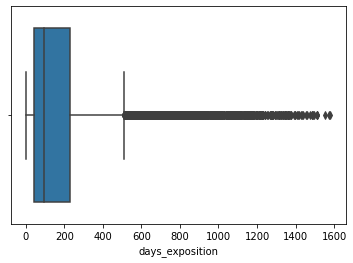

In [97]:
sns.boxplot(x=data['days_exposition'])

<AxesSubplot:>

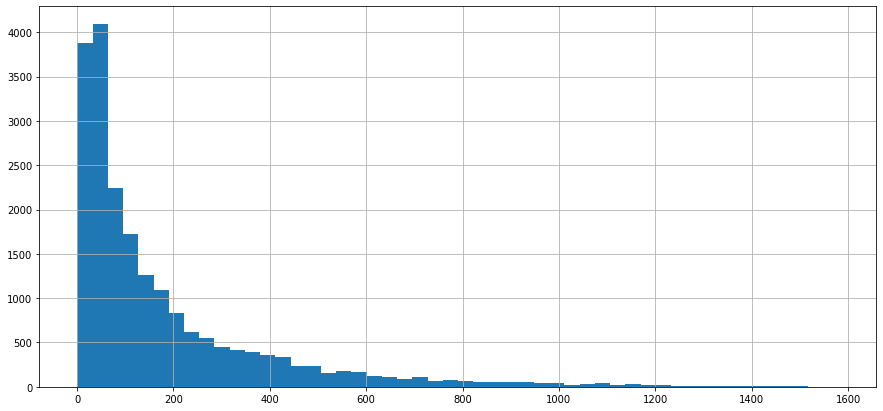

In [98]:
data['days_exposition'].hist(bins=50, figsize=(15, 7))

In [99]:
print('Медиана:', data['days_exposition'].median())
print('Среднее:', data['days_exposition'].mean())

Медиана: 95.0
Среднее: 180.7413945278023


<AxesSubplot:>

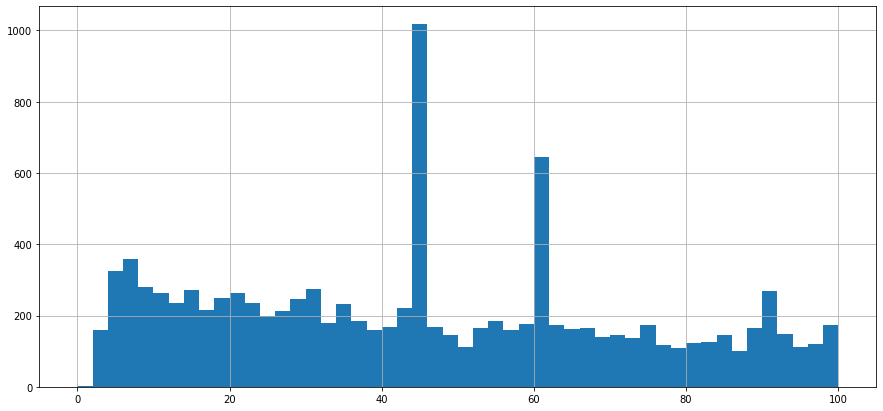

In [100]:
data['days_exposition'].hist(bins=50, figsize=(15, 7), range=(0, 100))

In [101]:
data.query('0 < days_exposition < 100')['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
7.0     234
30.0    208
90.0    200
4.0     174
3.0     157
5.0     152
14.0    147
9.0     142
Name: days_exposition, dtype: int64

Интересные два пика: чаще всего объявления висят 45 и 60 дней, далее ровно неделю, затем 30 и 90 дней. 

In [102]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [103]:
data['days_exposition'].median()

95.0

Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3 месяца для продажи квартиры - очень неплохой срок.


<AxesSubplot:>

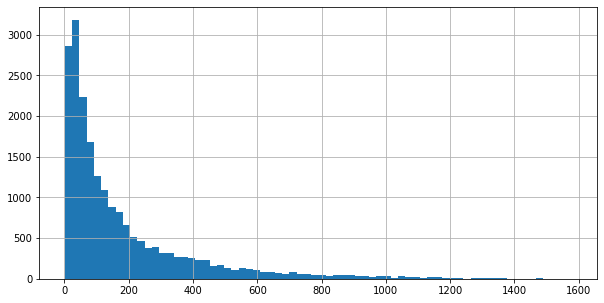

In [104]:
data['days_exposition'].hist(bins=70, figsize=(10,5))

Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

<AxesSubplot:>

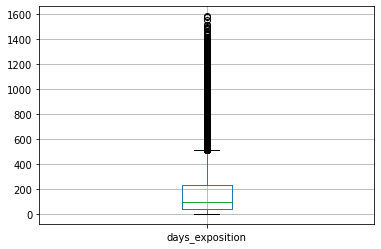

In [105]:
data.boxplot(column='days_exposition')

Ограничим срок продажи 500 днями, чтоб убрать выбросы. Посмотрим на данные более детально:

<AxesSubplot:>

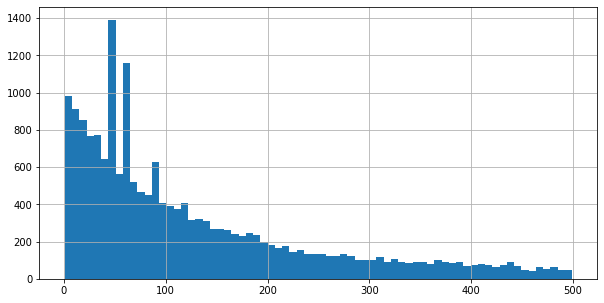

In [106]:
data.query('days_exposition < 500')['days_exposition'].hist(bins=70, figsize=(10,5))

Пики продаж продаж приходятся на период от 0 до 100 дней

<AxesSubplot:>

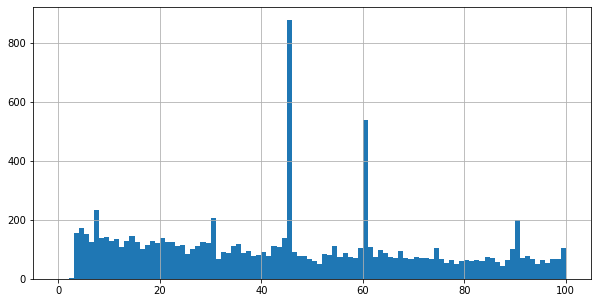

In [107]:
data.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(10,5),range=(0,100))

Вполне возможно, что сделки закрываются следующим образом: раз в 15 дней или на почту продавцу приходит вопрос, продал ли он квартиру, он заходит и делает соответствующую пометку, или ему звонит оператор и по телефону задает тот же вопрос и закрывает/не закрывает объявление согласно полученной информации. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, что большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15 дней, имеем такие вот данные. На всякий случай, учтем ещё и другое количество дней, кратное 15, - 30:

**Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта**

<AxesSubplot:>

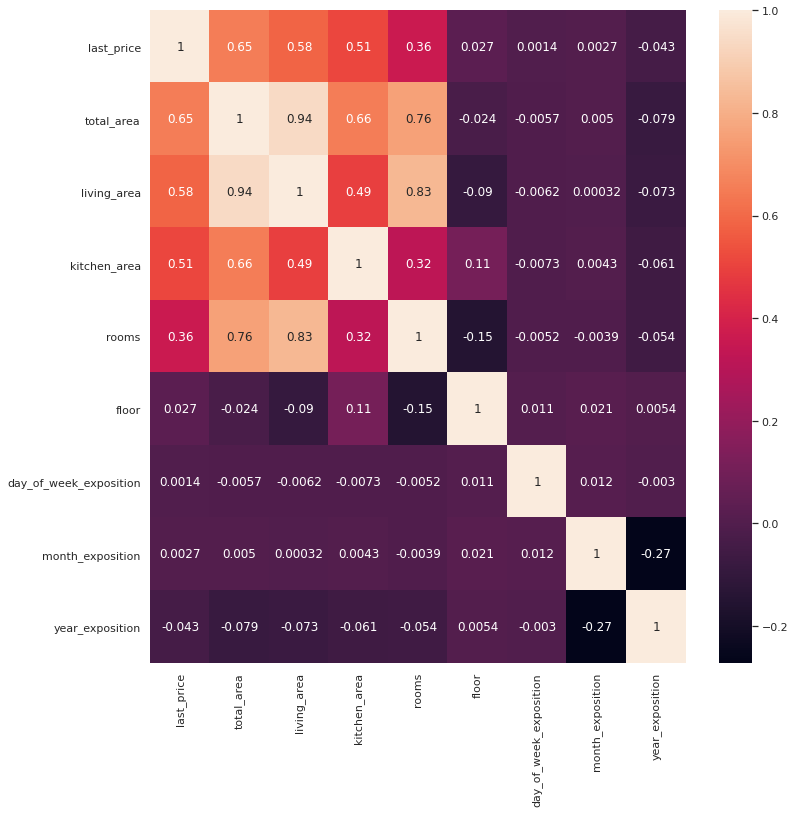

In [108]:
sns.set(rc={'figure.figsize':(12, 12)})

sns.heatmap(data[['last_price', 'total_area', 'living_area', 
                  'kitchen_area', 'rooms', 'floor', 
                  'day_of_week_exposition', 'month_exposition', 
                  'year_exposition','floor_type']].corr(), annot = True)

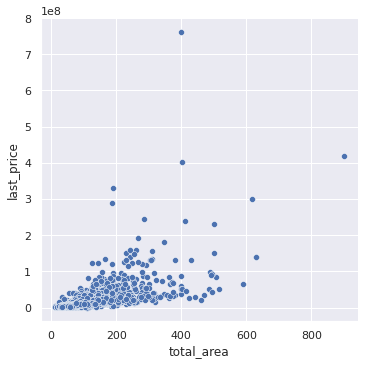

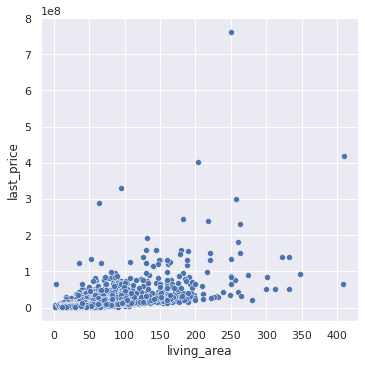

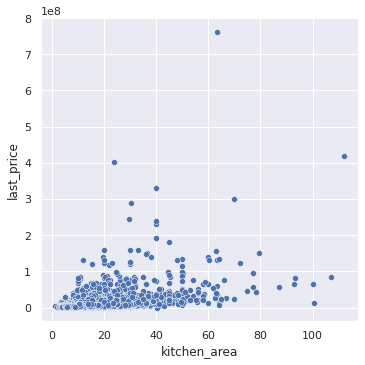

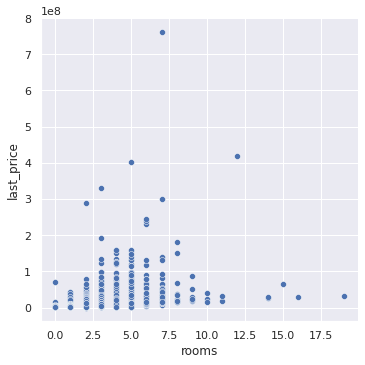

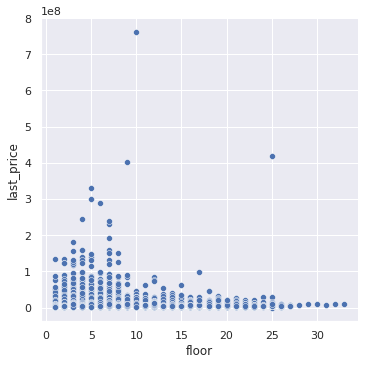

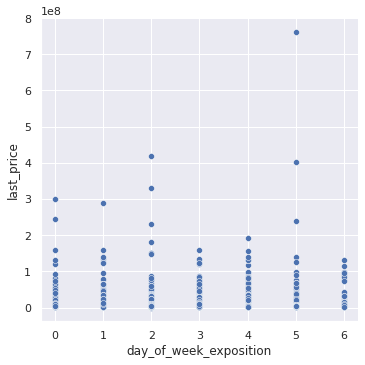

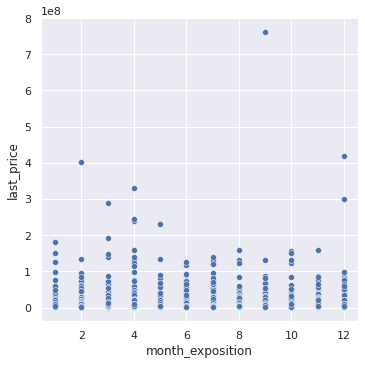

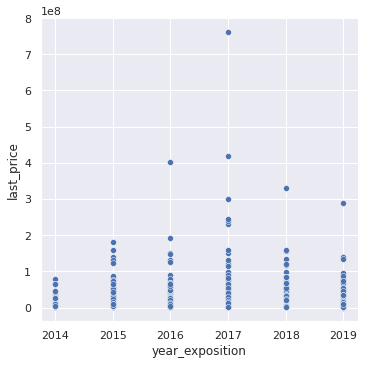

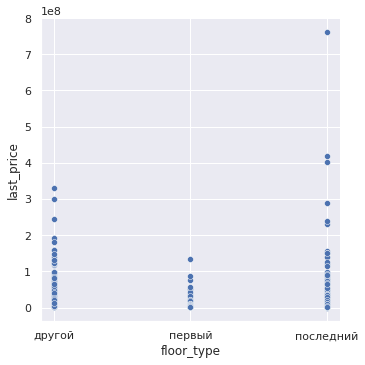

In [109]:
sns.set(rc={'figure.figsize':(5, 5)})
for col in ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 
            'day_of_week_exposition', 'month_exposition', 'year_exposition','floor_type']:
    sns.relplot(x=data[col], y=data['last_price'])

На графиках мы видим, что наибольшее влияние на цену квартиры оказывают общая и жилая площадь, менее значительное влияние оказывают площадь кухни и количество комнат в квартире.

На графиках мы видим, что наибольшее влияние на цену квартиры оказывают общая и жилая площадь, менее значительное влияние оказывают площадь кухни и количество комнат в квартире.  
Также нам тэо подтверждает Корреляция Пирсона, чем значение в нашем случае ближе к 1, тем лучше зависимость, а это в свою очередь Общая и Жилая площади.

**Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Выделим эти населенные пункты:

In [110]:
data['locality_name'].value_counts().head(10)

санкт-петербург    15651
мурино               586
кудрово              470
шушары               439
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64

In [111]:
city = ['санкт-петербург','мурино','кудрово','шушары','всеволожск','пушкин','колпино','парголово','гатчина','выборг']
df = data.loc[data['locality_name'].isin(city)]
df['price_area'].head()

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: price_area, dtype: float64

In [117]:
data.groupby('locality_name').agg({'locality_name':'count','price_area':'median'})\
    .rename(columns ={'locality_name':'count'})\
    .sort_values('count', ascending=False)\
    .head(10)

,count,price_area
locality_name,,
санкт-петербург,15651,104775.0
мурино,586,86250.5
кудрово,470,95555.0
шушары,439,76829.0
всеволожск,398,65789.0
пушкин,369,100000.0
колпино,338,74723.5
парголово,327,91643.0
гатчина,307,67797.0


Ожидаемо,что самая дорогая цена среди самых популярных населенных пунктов в Санкт-Петербурге, а самая низкая - в Выборге.

**Выделим квартиры в Санкт-Петербурге, вычислим среднюю цену каждого километра.**

In [114]:
spb = data[data['locality_name'] == 'санкт-петербург']
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_area,day_of_week_exposition,month_exposition,year_exposition,floor_type,center_distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,83.629164,9,False,...,84.0,3,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
7,5,7915000,71.6,2019-04-18,2,2.65,24,37.659422,22,False,...,NaN,0,NaN,NaN,110545.0,3,4,2019,другой,12.0


In [115]:
mean_spb = spb['last_price'].sum() / spb['center_distance_km'].sum()
print(f'Средняя цена для каждого километра: {mean_spb.round()} рублей')

Средняя цена для каждого километра: 698925.0 рублей


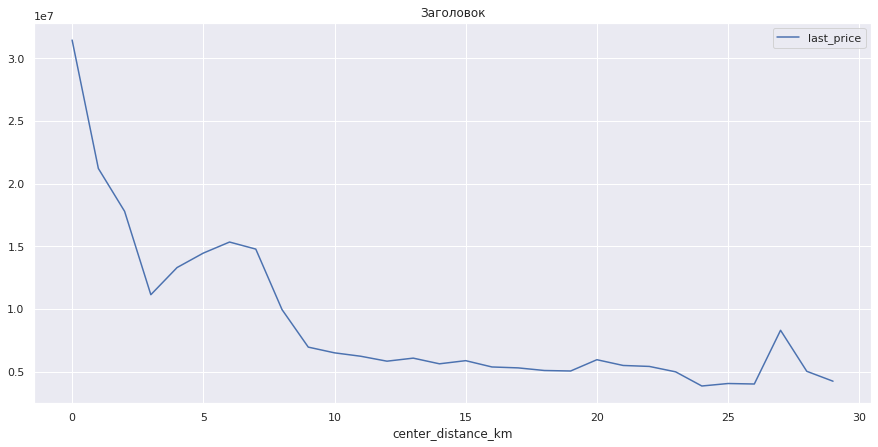

In [116]:
spb.pivot_table(index='center_distance_km', values='last_price').plot(figsize=(15,7), title = 'Заголовок');

По графику видно, что наиболее близкие к центру квартиры имеют наибольшую цену, падение цены на графике резко изменилось около расстояния в 10 км. По этим причинам можно сделать вывод, что к квартирам, находящимся в центре, можно относить квартиры в радиусе менее 10 км от центра Санкт-Петербурга.

### Общий вывод


Можно подвести итог о том, какая была проделана работа:  



---


*   Преобработка данных:  
   * во многих столбцах были пропущены значения, большую часть, которую сложно заменить и скорее всего это связано с ошибкой при сборе данных.Также присутствовали аномальные значения, которые выбивались из логики.

*   После были объявленые нужные для анализа столбцы:   
  * цена кв. метра; 
  * день недели публикации;  
  * месяц публикации; 
  * год публикации;  
  * тип этажа; 
  * расстояние до центра города в километрах.

*   После мы приступили непосредственно к исследованию:
  * были проанализированны параметры объектов (общая площадь, этаж квартиры, общая этажность дома, расстояние до аэропорта и т. д.);
  * изучена скорость продажи квартир с помощью сервиса, найдено среднее и медианное время, установлены рамки, относительно которых можно судить о том, что квартира была продана медленно или быстро;
  *  при помощи корреляций были изучены зависимости стоимости квартиры от её параметров, построены графики;
  *  найдены самые популярные населенные пункты, в которых чаще всего продают квартиры, для таких пунктов были найдены средние цены квадратного метра;
  * для Санкт-Петербурга было найдено, как меняется цена квартиры в зависимости от удалённости от центра города.

  

>Обобщая все наше исследование, чаще всего на Яндекс.Недвижимости в Ленинградской области выставляют 1-2 комнатные квартиры в 9-и и 5-ти этажных домах с высотой потолков в районе 2.7 метров и средней общей площадью 46.35. Среди самых популярных (топ-10) городов в сервисе самая дешевая цена за квадратный метр - в Выборге, всего 58.1 тыс. рублей, самая дорогая - в Санкт-Петербурге, здесь стоимость составляет 115 тыс. рублей за квадратный метр, при этом в Санкт-Петербурге намного больше объявлений (самый популярный город). Наиболее близкие к центру в Санкт-Петербурге квартиры имеют наибольшую цену, а к квартирам в центре можно отнести квартиры в радиусе 10 км от центра города. Наибольшее влияние на стоимость квартир, ожидаемо, оказывают общая и жилая площадь.







